<a href="https://colab.research.google.com/github/iritwikdas/Python_ML_Practice/blob/main/PCA_Iris_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names = ['sepal length','sepal width','petal length','petal width','target'])

df

Standardaized

In [19]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:,features].values
y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

In [ ]:
import numpy as np

x = np.array(x)

x = pd.DataFrame(x,columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

x

In [15]:
from sklearn.decomposition import PCA       

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns=['PC1','PC2'])

principalDf

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [22]:
finalDf = pd.concat([principalDf,df[['target']]],axis = 1)

finalDf

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


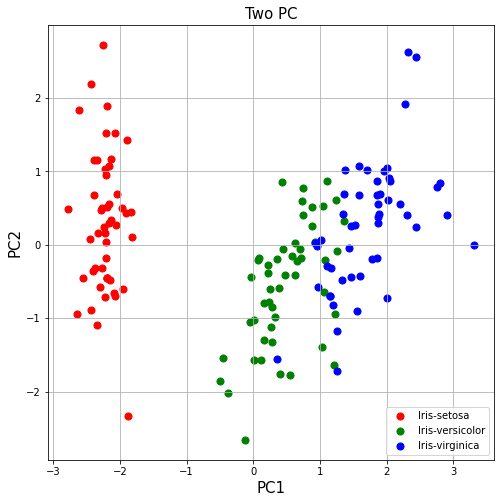

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize =15)
ax.set_ylabel('PC2', fontsize =15)
ax.set_title('Two PC', fontsize =15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

color = ['r','g','b']

for target, color in zip(targets,color):
  indicesToKeep = finalDf['target'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
             finalDf.loc[indicesToKeep, 'PC2'],
             c = color,
             s = 50)

ax.legend(targets)
ax.grid()
fig.show()
